# Exercise 1: Car Sales Data Analysis  
### Supervised & Unsupervised Learning  

This notebook explores a dataset of 55,000 second-hand car sales in the UK.  
The analysis focuses on two main tasks:  

1. **Supervised Learning** – building regression models to predict car prices using numerical and categorical features. Models considered include linear and polynomial regression, Random Forest, Gradient Boosting, and Artificial Neural Networks (ANNs).  
2. **Unsupervised Learning** – applying clustering methods such as k-Means, DBSCAN, and Agglomerative clustering to identify natural groupings in the dataset (e.g., premium, mid-range, and budget cars).  

The goal is to evaluate which models provide the most accurate predictions of car prices, and which clustering approaches reveal the most meaningful market segments.  


In [3]:

# ============================
# 1. Import libraries
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

sns.set(style="whitegrid")

## 1. Utility Functions  

To streamline the analysis, I defined several helper functions:  

- **`evaluate_regression_model`**  
  - I fitted a regression model, made predictions, and evaluated performance using R² and RMSE.  
  - I also generated a scatter plot of predicted vs. actual car prices to assess model accuracy visually.  

- **`plot_elbow_method`**  
  - I implemented the elbow method to help determine the optimal number of clusters (k) for k-Means.  
  - I plotted inertia against different values of k to identify the point of diminishing returns.  

- **`cluster_scatter_plot`**  
  - I visualised clustering results in a scatter plot, colouring points by their assigned cluster.  
  - This allowed me to interpret the outputs of k-Means, DBSCAN, and Agglomerative clustering.  


In [5]:
# ============================
# 2. Utility Functions
# ============================

def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """
    I fitted a regression model, predicted values, and evaluated its performance.
    I returned R² and RMSE for comparison and plotted predicted vs actual prices.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{model_name} --> R²: {r2:.4f}, RMSE: {rmse:.2f}")
    
    # I plotted predicted vs actual prices
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Predicted vs Actual Prices ({model_name})')
    plt.show()
    
    return r2, rmse

def plot_elbow_method(X, k_range=(2, 10)):
    """
    I plotted the elbow method to determine the optimal number of clusters for k-Means.
    """
    inertia = []
    for k in range(k_range[0], k_range[1]):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(X)
        inertia.append(km.inertia_)
    plt.figure(figsize=(6,4))
    plt.plot(range(k_range[0], k_range[1]), inertia, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for k-Means')
    plt.show()

def cluster_scatter_plot(df, x_col, y_col, label_col, title):
    """
    I visualized clustering results using scatter plots with cluster labels.
    """
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=x_col, y=y_col, hue=label_col, data=df, palette="viridis", legend='full')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()


## 2. Load Dataset  

I loaded the car sales dataset and inspected its structure.  
Specifically, I checked the dataset’s shape (number of rows and columns) and displayed the first few rows to confirm that the data had been read correctly.  


In [7]:
# ============================
# 3. Load Dataset
# ============================
# I loaded the car sales dataset and inspected its shape and first few rows.
car_data = pd.read_csv(r"C:\Users\HP\Desktop\ARTIFICIAL INTELLIGENCE AND DATA SCIENCE - HULL LONDON\MSC. AI & DATA SCIENCE\FINAL ASSESSMENT - MSC AI & DATA SCIENCE\UNSTANDING AI\car_sales_data.csv")
print("Dataset shape:", car_data.shape)
print(car_data.head())

Dataset shape: (50000, 7)
  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  
0   127300   3074  
1    57850  49704  
2    39190  24072  
3   210814   1705  
4   127869   4101  


## 3. Updated Evaluation Function  

I created an updated evaluation function to train, predict, and evaluate regression models.  
This function reported both R² and RMSE scores and generated a scatter plot of predicted vs. actual car prices.  
I also added the option to save plots to file when needed (e.g., for engine size comparisons).  


In [12]:
# ============================
# 1. Updated evaluation function
# ============================
def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name="Model", save_path=None):
    """
    Train, predict, and evaluate a regression model.
    Optionally saves the Predicted vs Actual plot if save_path is provided.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name}: R²={r2:.4f}, RMSE={rmse:.2f}")

    # Plot predicted vs actual
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Predicted vs Actual Prices ({model_name})')

    # Save the plot before showing
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    plt.show()
    return r2, rmse




## 4. Single-Variable Regression  

I trained linear and polynomial regression models using one numerical feature at a time: **Engine size**, **Year of manufacture**, and **Mileage**.  
For each feature, I split the data into training and test sets, fitted both models, and compared performance using R² and RMSE.  

- For **Engine size**, I saved the predicted vs. actual plots for both the linear and polynomial models.  
- For the other features (Year of manufacture and Mileage), I evaluated performance but did not save the plots.  

This allowed me to identify which single numerical variable was the most informative predictor of car prices.  

Linear (Engine size): R²=0.1506, RMSE=15182.20


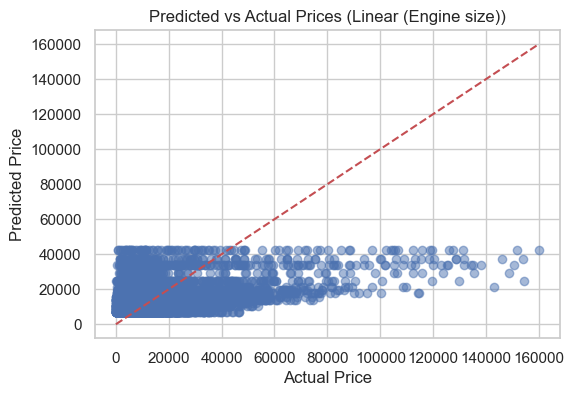

Polynomial (Engine size): R²=0.1513, RMSE=15176.50


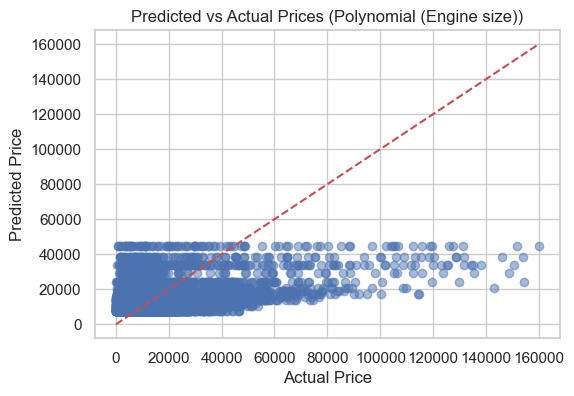

Linear (Year of manufacture): R²=0.5111, RMSE=11518.64


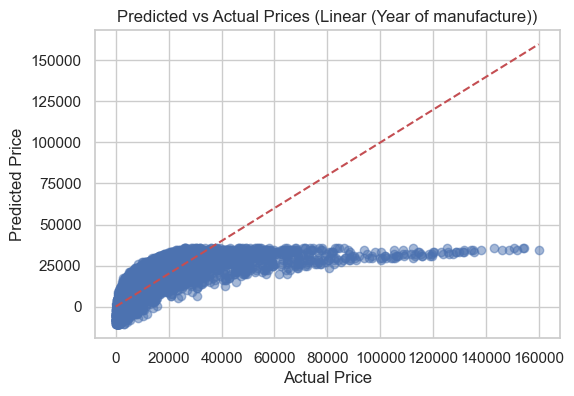

Polynomial (Year of manufacture): R²=0.6094, RMSE=10295.33


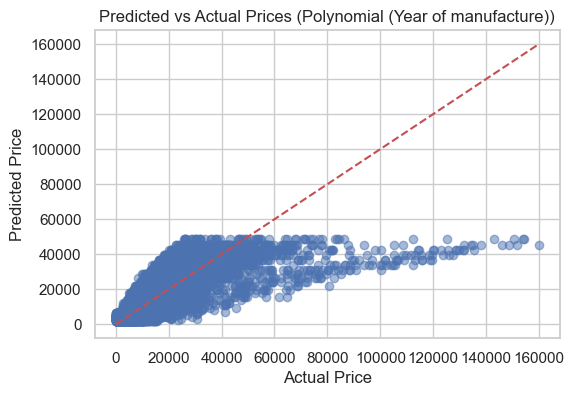

Linear (Mileage): R²=0.4013, RMSE=12746.32


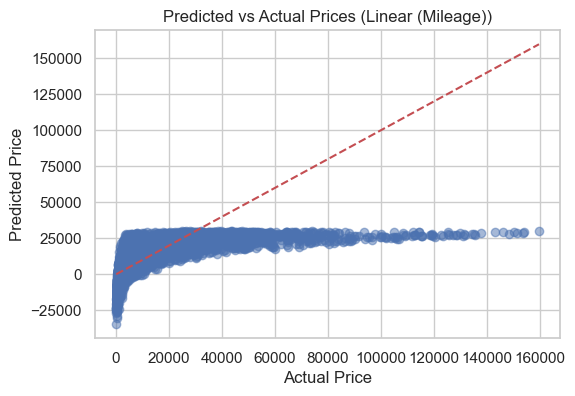

Polynomial (Mileage): R²=0.5224, RMSE=11385.09


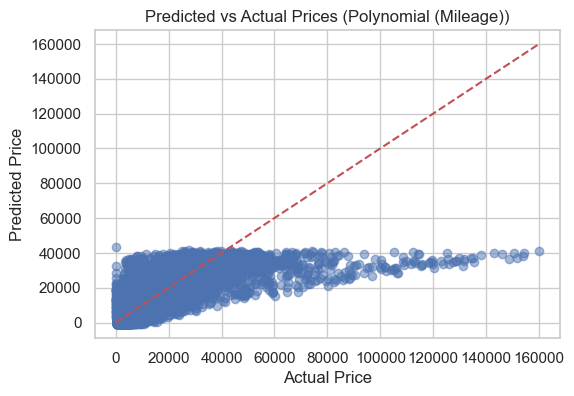

In [15]:
# ============================
# 2. Single-Variable Regression (save Engine size plots only)
# ============================
numeric_features = ["Engine size", "Year of manufacture", "Mileage"]
single_reg_results = {}

for feature in numeric_features:
    X = car_data[[feature]]
    y = car_data["Price"]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ----------------------------
    # Linear Regression
    # ----------------------------
    lin_reg = LinearRegression()
    save_file = "Linear_Engine_Size_Pred_vs_Actual.png" if feature == "Engine size" else None
    r2, rmse = evaluate_regression_model(
        lin_reg, X_train, X_test, y_train, y_test,
        model_name=f"Linear ({feature})",
        save_path=save_file
    )
    single_reg_results[f"Linear ({feature})"] = (r2, rmse)

    # ----------------------------
    # Polynomial Regression (degree=2)
    # ----------------------------
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lin_poly = LinearRegression()
    save_file = "Polynomial_Engine_Size_Pred_vs_Actual.png" if feature == "Engine size" else None
    r2_poly, rmse_poly = evaluate_regression_model(
        lin_poly, X_train_poly, X_test_poly, y_train, y_test,
        model_name=f"Polynomial ({feature})",
        save_path=save_file
    )
    single_reg_results[f"Polynomial ({feature})"] = (r2_poly, rmse_poly)

## 5. Multi-Variable Regression

I combined all numerical features (**Engine size**, **Year of manufacture**, and **Mileage**) to perform multi-variable linear regression.  
I split the data into training and test sets, fitted the linear regression model, and evaluated its performance using R² and RMSE.  

I also saved the predicted vs. actual plot to visually assess how well the model captured the variation in car prices when using multiple numerical inputs.  

This allowed me to compare the multi-variable model’s accuracy with the single-variable models and assess whether including multiple features improved predictions.


Multi-variable Linear Regression: R²=0.6715, RMSE=9442.38


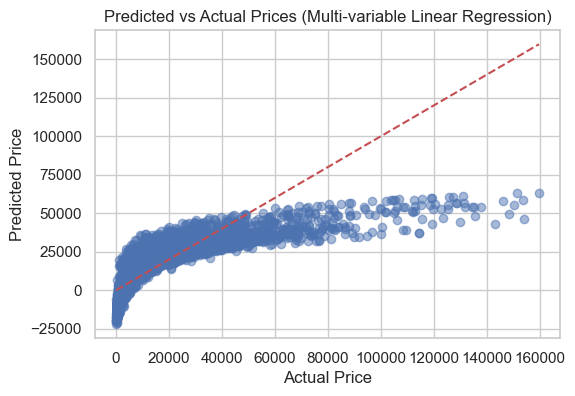

In [18]:
# ============================
# 5. Multi-Variable Regression (save plot)
# ============================
# I combined multiple numeric features to perform multi-variable regression
X = car_data[numeric_features]
y = car_data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_lin = LinearRegression()
# Save plot for report
save_file = "MultiVariable_Linear_Pred_vs_Actual.png"
multi_r2, multi_rmse = evaluate_regression_model(
    multi_lin, X_train, X_test, y_train, y_test,
    model_name="Multi-variable Linear Regression",
    save_path=save_file
)


## 6. Random Forest & Gradient Boosting (Categorical + Numerical Features)

I combined numerical features (**Engine size**, **Year of manufacture**, **Mileage**) with categorical features (**Manufacturer**, **Model**, **Fuel type**) to build ensemble regression models.  
I encoded the categorical variables using one-hot encoding and split the data into training and test sets.  

I trained a **Random Forest Regressor** and a **Gradient Boosting Regressor**, then evaluated their performance using R² and RMSE.  
I also saved predicted vs. actual plots for both models to visually assess their accuracy when using all available features.  

This allowed me to determine whether including categorical variables improved model performance compared to numerical-only models and to compare the effectiveness of different ensemble approaches.


Random Forest (all features): R²=0.9985, RMSE=636.03


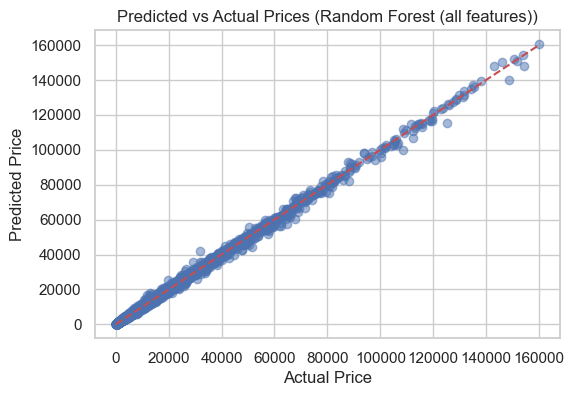

Gradient Boosting (all features): R²=0.9971, RMSE=881.75


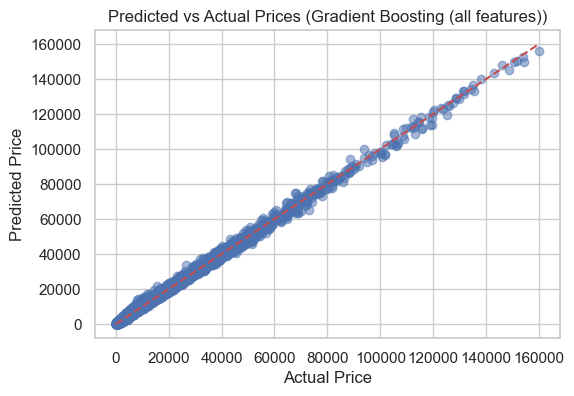

In [21]:
# ============================
# 6. Random Forest & Gradient Boosting (categorical + numerical)
# ============================
cat_features = ["Manufacturer", "Model", "Fuel type"]
all_features = numeric_features + cat_features

# I encoded categorical variables using one-hot encoding
X = pd.get_dummies(car_data[all_features])
y = car_data["Price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# Random Forest
# ----------------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf_r2, rf_rmse = evaluate_regression_model(
    rf, X_train, X_test, y_train, y_test,
    model_name="Random Forest (all features)",
    save_path="Random_Forest_All_Features_Pred_vs_Actual.png"
)

# ----------------------------
# Gradient Boosting
# ----------------------------
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
gb_r2, gb_rmse = evaluate_regression_model(
    gb, X_train, X_test, y_train, y_test,
    model_name="Gradient Boosting (all features)",
    save_path="Gradient_Boosting_All_Features_Pred_vs_Actual.png"
)


## 7. Artificial Neural Network (ANN)

I standardized all features before training the Artificial Neural Network to ensure that numerical and one-hot encoded categorical variables were on a similar scale.  
I then split the scaled data into training and test sets.  

I trained a **Multi-Layer Perceptron (MLP) Regressor** with two hidden layers (128 and 64 neurons), ReLU activation, and the Adam optimizer.  
The model was trained for 300 iterations, and I evaluated its performance using R² and RMSE.  

I also saved the predicted vs. actual plot to visually assess the ANN's ability to predict car prices using all features.  
This helped me compare the ANN’s performance against other regression models and determine its effectiveness for this dataset.


Artificial Neural Network: R²=0.9999, RMSE=143.74


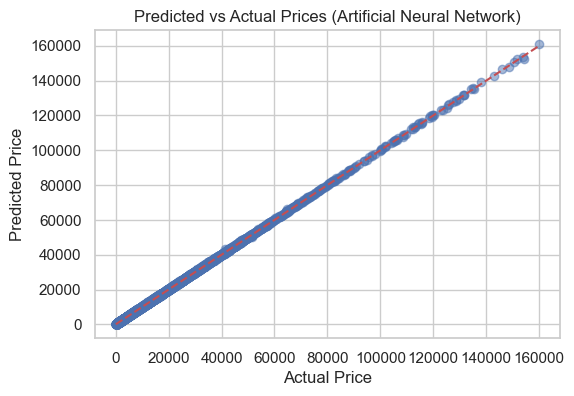

In [23]:
# ============================
# 7. Artificial Neural Network (ANN)
# ============================
# I standardized the features before training ANN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# I trained and evaluated an MLP regressor
mlp = MLPRegressor(hidden_layer_sizes=(128,64), activation='relu', solver='adam',
                   learning_rate_init=0.001, max_iter=300, random_state=42)

# Save plot for report
save_file = "ANN_All_Features_Pred_vs_Actual.png"
mlp_r2, mlp_rmse = evaluate_regression_model(
    mlp, X_train, X_test, y_train, y_test,
    model_name="Artificial Neural Network",
    save_path=save_file
)


## 8. Clustering

I selected **Engine size**, **Mileage**, and **Price** as input features for clustering analysis to explore natural groupings in the dataset.  

---

### 8.1 k-Means Clustering

I applied the **elbow method** to determine the optimal number of clusters (k) by plotting inertia for k values from 2 to 10.  

Based on the elbow plot, I fitted **k-Means clustering** with k = 3 and assigned the resulting cluster labels to the dataset.  
I calculated the **silhouette score** to evaluate cluster cohesion and separation.  

Finally, I visualised the clusters using a scatter plot of **Mileage vs. Price**, colouring points by their k-Means cluster assignment.  
I also saved the plot for use in the report to illustrate the clustering results and help interpret the different car segments.


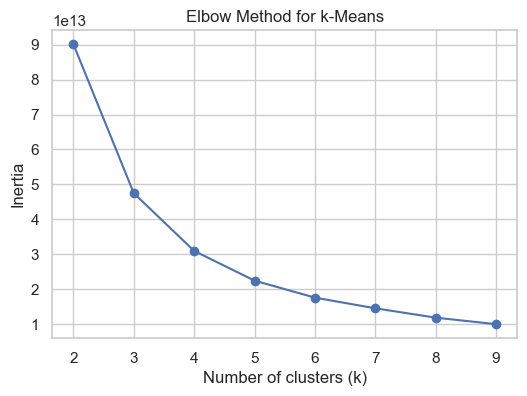

k-Means silhouette score: 0.5323255139199137


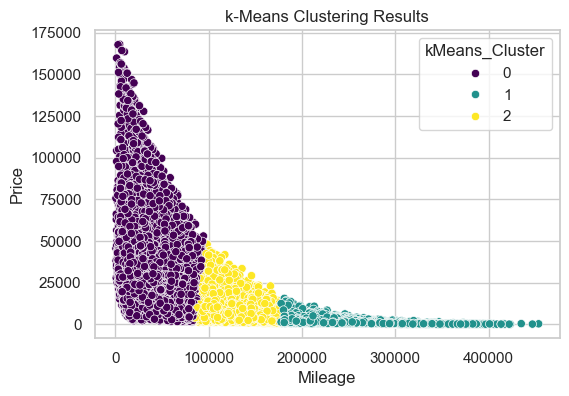

In [27]:

# ============================
# 8. Clustering
# ============================
X_cluster = car_data[["Engine size", "Mileage", "Price"]]

# ============================
# 8.1 k-Means Clustering
# ============================
# I plotted the elbow method to choose optimal k
plot_elbow_method(X_cluster, k_range=(2,10))

# I fitted k-Means with k=3
km = KMeans(n_clusters=3, random_state=42)
labels_km = km.fit_predict(X_cluster)
car_data['kMeans_Cluster'] = labels_km

# Calculate silhouette score
silhouette_km = silhouette_score(X_cluster, labels_km)
print("k-Means silhouette score:", silhouette_km)

# ----------------------------
# Scatter plot of clusters
# ----------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(x="Mileage", y="Price", hue="kMeans_Cluster", data=car_data, palette="viridis")
plt.title("k-Means Clustering Results")
plt.xlabel("Mileage")
plt.ylabel("Price")

# Save plot for report
plt.savefig("kMeans_Mileage_vs_Price.png", bbox_inches='tight')
plt.show()


### 8.2 DBSCAN Clustering

I standardized the clustering features (**Engine size**, **Mileage**, **Price**) before applying **DBSCAN** to handle density-based clustering and detect potential outliers.  
I set ε = 0.5 and min_samples = 10, then assigned the resulting cluster labels to the dataset.  

I evaluated cluster quality using the **silhouette score** (when more than one cluster was identified) and visualised the clusters with a scatter plot of **Mileage vs. Price**, colouring points by their DBSCAN cluster labels.  
The plot was saved for inclusion in the report to illustrate the density-based clustering results.

---

### 8.3 Agglomerative Clustering

To reduce computational load, I randomly sampled 5,000 rows from the dataset.  
I applied **Agglomerative Clustering** with 3 clusters and assigned the labels to the sampled data.  

I calculated the **silhouette score** to assess cluster quality and visualised the clusters in a scatter plot of **Mileage vs. Price**.  
This allowed me to compare hierarchical clustering results with k-Means and DBSCAN and interpret the natural groupings in the dataset.  
The plot was saved for use in the report.


DBSCAN silhouette score: 0.3407210459805706


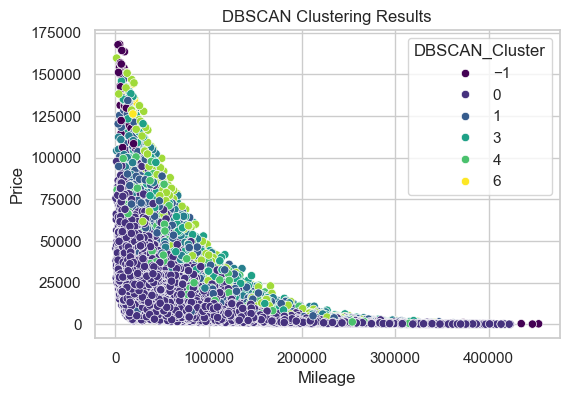

Agglomerative silhouette score: 0.33625791618080486


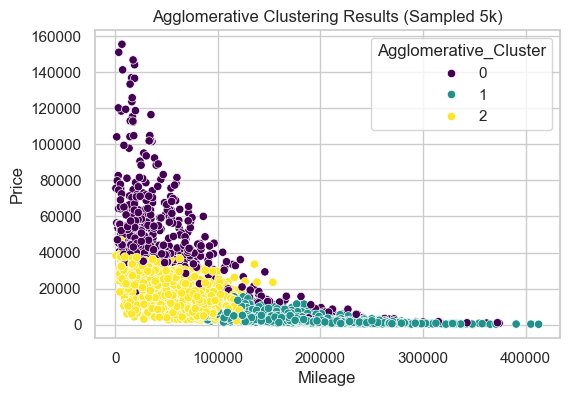

In [30]:
# ============================
# DBSCAN Clustering
# ============================
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# I applied DBSCAN on the standardized dataset
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels_db = dbscan.fit_predict(X_cluster_scaled)
car_data['DBSCAN_Cluster'] = labels_db

# Evaluate silhouette score
if len(set(labels_db)) > 1:
    silhouette_db = silhouette_score(X_cluster_scaled, labels_db)
    print("DBSCAN silhouette score:", silhouette_db)

# Scatter plot of DBSCAN clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x="Mileage", y="Price", hue="DBSCAN_Cluster", data=car_data, palette="viridis")
plt.title("DBSCAN Clustering Results")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.savefig("DBSCAN_Mileage_vs_Price.png", bbox_inches='tight')
plt.show()

# ============================
# Agglomerative Clustering
# ============================
# Sample 5,000 rows to reduce computation
sample_idx = np.random.choice(car_data.index, 5000, replace=False)
sample_data = X_cluster_scaled[sample_idx, :]
sample_df = car_data.loc[sample_idx].copy()

agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(sample_data)
sample_df['Agglomerative_Cluster'] = labels_agg

silhouette_agg = silhouette_score(sample_data, labels_agg)
print("Agglomerative silhouette score:", silhouette_agg)

# Scatter plot of Agglomerative clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x="Mileage", y="Price", hue="Agglomerative_Cluster", data=sample_df, palette="viridis")
plt.title("Agglomerative Clustering Results (Sampled 5k)")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.savefig("Agglomerative_Mileage_vs_Price.png", bbox_inches='tight')
plt.show()
